## **Model Building - Detection**

In [ ]:
! pip install zip-files


In [ ]:
#Make the license_plates_detection_train.zip (in .zip format) so that we can upload all the files in it and we can extract that using code

In [ ]:
#code to extract the license_plates_detection_train.zip

import zipfile

zip_path = "/content/license_plates_detection_train.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        try:
            zip_ref.extract(file, extract_path)
            print(f"Extracted: {file}")
        except Exception as e:
            print(f"Error extracting {file}: {e}")


Extracted: license_plates_detection_train/1.jpg
Extracted: license_plates_detection_train/10.jpg
Extracted: license_plates_detection_train/100.jpg
Extracted: license_plates_detection_train/101.jpg
Extracted: license_plates_detection_train/102.jpg
Extracted: license_plates_detection_train/103.jpg
Extracted: license_plates_detection_train/104.jpg
Extracted: license_plates_detection_train/105.jpg
Extracted: license_plates_detection_train/106.jpg
Extracted: license_plates_detection_train/107.jpg
Extracted: license_plates_detection_train/108.jpg
Extracted: license_plates_detection_train/109.jpg
Extracted: license_plates_detection_train/11.jpg
Extracted: license_plates_detection_train/110.jpg
Extracted: license_plates_detection_train/111.jpg
Extracted: license_plates_detection_train/112.jpg
Extracted: license_plates_detection_train/113.jpg
Extracted: license_plates_detection_train/114.jpg
Extracted: license_plates_detection_train/115.jpg
Extracted: license_plates_detection_train/116.jpg
Extr

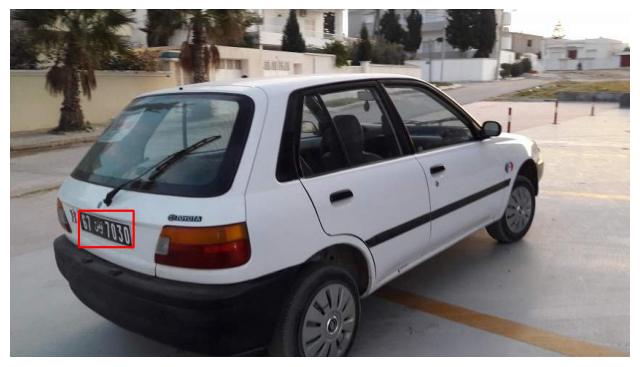

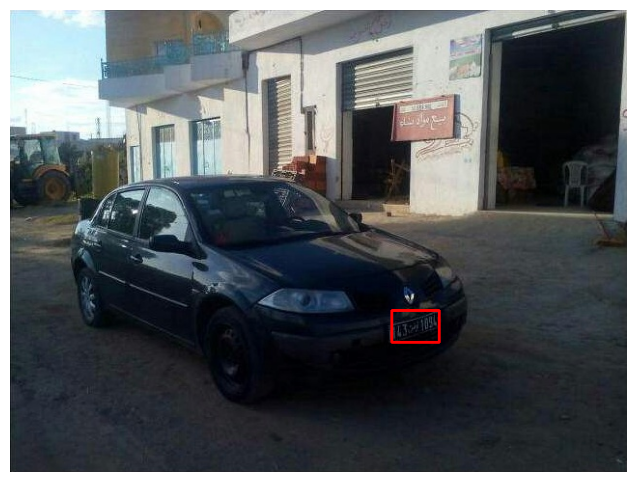

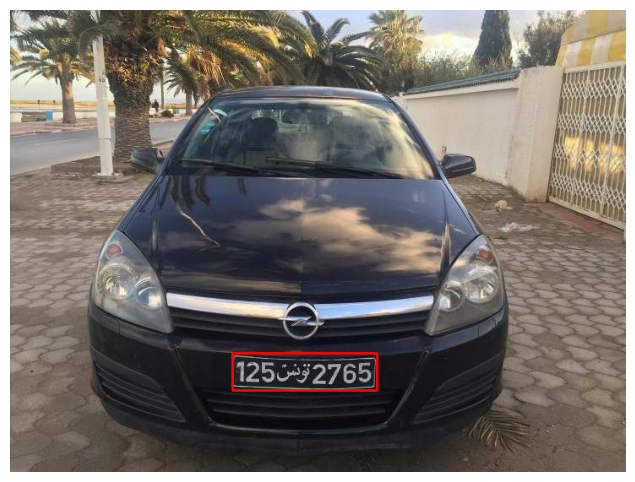

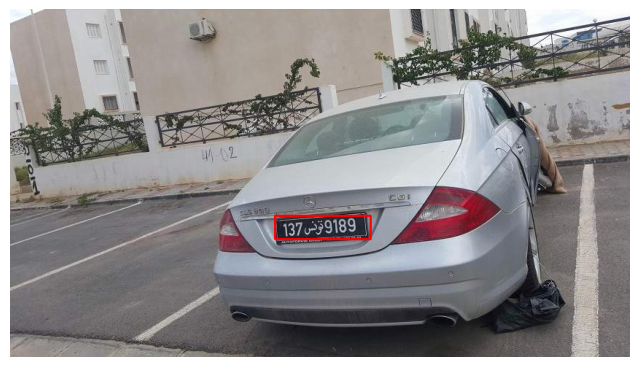

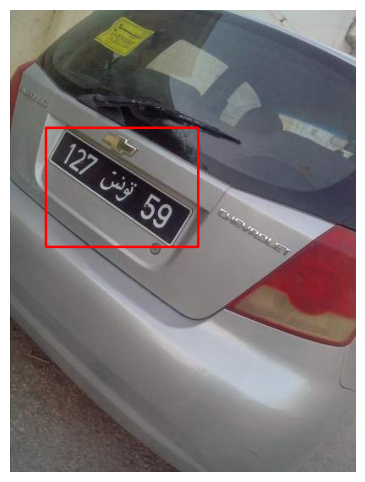

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("/content/Licplatesdetection_train.csv")

# Set image directory path
image_dir = "/content/license_plates_detection_train/"

# Function to display image with bounding box
def show_image_with_bbox(img_id, ymin, xmin, ymax, xmax):
    img_path = f"{image_dir}{img_id}"
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error loading image: {img_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw bounding box
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Show image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Display sample images
for i in range(5):
    row = df.iloc[i]
    show_image_with_bbox(row["img_id"], row["ymin"], row["xmin"], row["ymax"], row["xmax"])


In [ ]:
! pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
import cv2
import pandas as pd

# Load CSV file
df = pd.read_csv("/content/Licplatesdetection_train.csv")

# Define paths
image_dir = "/content/license_plates_detection_train/"
output_dir = "/content/dataset/"

# Create necessary directories
os.makedirs(output_dir + "images/train", exist_ok=True)
os.makedirs(output_dir + "images/val", exist_ok=True)
os.makedirs(output_dir + "labels/train", exist_ok=True)
os.makedirs(output_dir + "labels/val", exist_ok=True)

# Split dataset (80% train, 20% val)
train_split = int(0.8 * len(df))
train_df = df[:train_split]
val_df = df[train_split:]

# Function to convert to YOLO format
def convert_to_yolo(row, img_w, img_h):
    x_min, y_min, x_max, y_max = row["xmin"], row["ymin"], row["xmax"], row["ymax"]

    # Convert to YOLO format (normalized)
    center_x = (x_min + x_max) / (2 * img_w)
    center_y = (y_min + y_max) / (2 * img_h)
    width = (x_max - x_min) / img_w
    height = (y_max - y_min) / img_h

    return f"0 {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}"

# Function to process dataset
def process_dataset(df, img_output_dir, label_output_dir):
    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row["img_id"])
        image = cv2.imread(img_path)

        if image is None:
            print(f"Error loading image: {img_path}")
            continue

        img_h, img_w, _ = image.shape

        # Save image to new location
        new_img_path = os.path.join(img_output_dir, row["img_id"])
        cv2.imwrite(new_img_path, image)

        # Convert bounding box to YOLO format
        yolo_label = convert_to_yolo(row, img_w, img_h)

        # Save label
        label_path = os.path.join(label_output_dir, row["img_id"].replace(".jpg", ".txt"))
        with open(label_path, "w") as f:
            f.write(yolo_label + "\n")

# Process train and validation sets
process_dataset(train_df, output_dir + "images/train/", output_dir + "labels/train/")
process_dataset(val_df, output_dir + "images/val/", output_dir + "labels/val/")

print("Dataset conversion completed!")


Dataset conversion completed!


In [ ]:
""" Create a data.yaml file in "dataset" Folder  """
""" Inside the file (data.yaml) give the path as given below"""
"""

train: /content/dataset/images/train  # Training images
val: /content/dataset/images/val  # Validation images
nc: 2  # Number of classes
names: ["class1", "class2"]  # Class names

"""

'  \n\ntrain: /content/dataset/images/train  # Training images\nval: /content/dataset/images/val  # Validation images\nnc: 2  # Number of classes\nnames: ["class1", "class2"]  # Class names\n\n'

In [ ]:
# Train the Model
!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset/data.yaml epochs=50 imgsz=640 batch=16 device=0


100% 21.5M/21.5M [00:00<00:00, 250MB/s]
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [ ]:
# Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/dataset/data.yaml


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/labels/val.cache... 180 images, 0 backgrounds, 0 corrupt: 100% 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:02<00:00,  4.34it/s]
                   all        180        180      0.999      0.994      0.995      0.804
                class1        180        180      0.999      0.994      0.995      0.804
Speed: 0.7ms preprocess, 8.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#Run Inference on Test Images
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/dataset/images/val/75.jpg


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/dataset/images/val/75.jpg: 640x512 1 class1, 42.7ms
Speed: 4.1ms preprocess, 42.7ms inference, 138.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#Finally We donwnload the Detection Model (best.pt)
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>